In [1]:
import tensorflow
tensorflow.random.set_seed(2)    # and the seed of the Tensorflow backend.
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
print(tensorflow.__version__)    # Should be at least 2.0.

2.1.0


In [2]:
EPOCHS  = 20   # Training run parameters.
SPLIT   = 0.2  # (80% training, 20% validation.)
SHUFFLE = True # Random shuffle on each epoch of train/val samples.
BATCH   = 32   # Batch size (note Keras default is 32).
OPT = 'adam'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)                # Initialise system RNG.
from tensorflow.keras.datasets import mnist

In [4]:
(training_inputs, training_labels), (testing_inputs, testing_labels) = mnist.load_data()

print(training_inputs.shape, training_inputs.dtype, testing_inputs.shape, testing_inputs.dtype)


(60000, 28, 28) uint8 (10000, 28, 28) uint8


In [5]:
training_images = (training_inputs.astype('float32')/255)[:,:,:,np.newaxis]  # Normalised float32 4-tensor.

categorical_training_outputs = to_categorical(training_labels)

testing_images = (testing_inputs.astype('float32')/255)[:,:,:,np.newaxis]

categorical_testing_outputs = to_categorical(testing_labels)
print(training_images.shape,training_images.dtype)
print(testing_images.shape,testing_images.dtype)
print(categorical_training_outputs.shape, training_labels.shape)
print(categorical_testing_outputs.shape, testing_labels.shape)

(60000, 28, 28, 1) float32
(10000, 28, 28, 1) float32
(60000, 10) (60000,)
(10000, 10) (10000,)


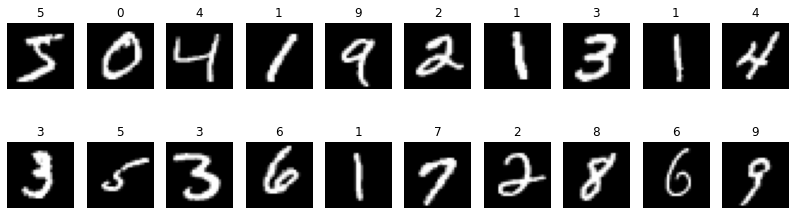

In [7]:
plt.figure(figsize=(14,4))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(training_images[i,:,:,0],cmap='gray')
    plt.title(str(training_labels[i]))
    plt.axis('off')


In [15]:
#Model 
model = Sequential()

model.add(Conv2D(32, kernel_size=3, padding='same', 
                 activation='relu',input_shape= training_images.shape[1:]))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=5,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=5, padding='same', 
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

In [16]:
print("The Keras network model")
model.summary()

The Keras network model
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
batch_normalization_8 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 12, 12, 32)        128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (

In [10]:

model.compile(loss='categorical_crossentropy', optimizer=OPT, metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, 
                     verbose=2, mode='auto',
                     restore_best_weights=True)


history = model.fit(training_images, categorical_training_outputs,
                    epochs=EPOCHS, 
                    batch_size=BATCH, 
                    shuffle=SHUFFLE, 
                    validation_split=SPLIT,
                    verbose=2, 
                    callbacks=[stop])


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 - 50s - loss: 0.2081 - accuracy: 0.9372 - val_loss: 0.0693 - val_accuracy: 0.9784
Epoch 2/20
48000/48000 - 43s - loss: 0.0732 - accuracy: 0.9780 - val_loss: 0.0404 - val_accuracy: 0.9883
Epoch 3/20
48000/48000 - 45s - loss: 0.0617 - accuracy: 0.9816 - val_loss: 0.0553 - val_accuracy: 0.9838
Epoch 4/20
48000/48000 - 46s - loss: 0.0534 - accuracy: 0.9841 - val_loss: 0.0306 - val_accuracy: 0.9918
Epoch 5/20
48000/48000 - 52s - loss: 0.0477 - accuracy: 0.9860 - val_loss: 0.0335 - val_accuracy: 0.9887
Epoch 6/20
48000/48000 - 54s - loss: 0.0403 - accuracy: 0.9882 - val_loss: 0.0286 - val_accuracy: 0.9923
Epoch 7/20
48000/48000 - 66s - loss: 0.0377 - accuracy: 0.9889 - val_loss: 0.0330 - val_accuracy: 0.9897
Epoch 8/20
48000/48000 - 71s - loss: 0.0336 - accuracy: 0.9898 - val_loss: 0.0244 - val_accuracy: 0.9930
Epoch 9/20
48000/48000 - 69s - loss: 0.0295 - accuracy: 0.9909 - val_loss: 0.0221 - val_accuracy: 0.9942
Epoch

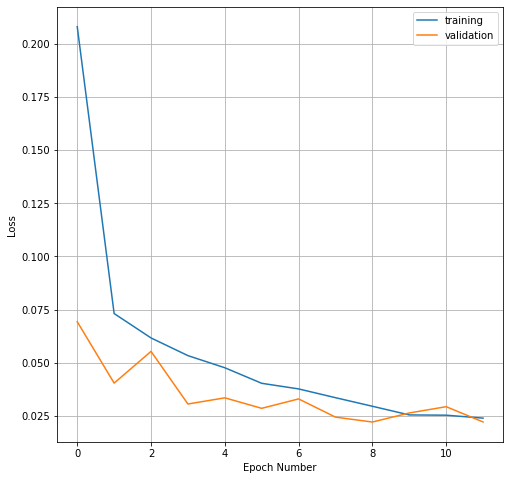

In [11]:
plt.figure('Training and Validation Losses per epoch', figsize=(8,8))

plt.plot(history.history['loss'],label='training') # Training data error per epoch.

plt.plot(history.history['val_loss'],label='validation') # Validation error per ep.

plt.grid(True)

plt.legend()

plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.show()


In [12]:
print("Performance of network on testing set:")
test_loss,test_acc = model.evaluate(testing_images,categorical_testing_outputs)
print("Accuracy on testing data: {:6.2f}%".format(test_acc*100))
print("Test error (loss):        {:8.4f}".format(test_loss))

Performance of network on testing set:
10000/10000 [==============================] - 5s 526us/sample - loss: 0.0182 - accuracy: 0.9945
Accuracy on testing data:  99.45%
Test error (loss):          0.0182


In [14]:
print("Performance of network on testing set:")
test_loss,test_acc = model.evaluate(testing_images,categorical_testing_outputs)
print("Accuracy on testing data: {:6.2f}%".format(test_acc*100))
print("Test error (loss):        {:8.4f}".format(test_loss))
print("Performance of network:")
print("Accuracy on training data:   {:6.2f}%".format(history.history['accuracy'][-1]*100))
print("Accuracy on validation data: {:6.2f}%".format(history.history['val_accuracy'][-1]*100))
print("Accuracy on testing data:    {:6.2f}%".format(test_acc*100))


Performance of network on testing set:
10000/10000 [==============================] - 4s 353us/sample - loss: 0.0182 - accuracy: 0.9945
Accuracy on testing data:  99.45%
Test error (loss):          0.0182
Performance of network:
Accuracy on training data:    99.25%
Accuracy on validation data:  99.37%
Accuracy on testing data:     99.45%
